# Using NTK

In [26]:
import pandas as pd
from collections import Counter
def ngram(a, n):
    g = []
    for i in a:
        t = i.split(" ")
        for j in range(len(t) - n + 1):
            e = " ".join(t[j:j + n])
            g.append(e)
    return g

def n_prob(a,n):
    pr = {}
    p = Counter(ngram(a,n-1))
    b = Counter(ngram(a,n))
    for i in b:
        h = " ".join(i.split(" ")[:-1])
        pr[i] = b[i]/p[h]
    return pr

def read_sentences_from_spreadsheet(file_path, column_name):
    df = pd.read_csv(file_path)
    sampled_df = df.sample(n=1000, random_state=42) 
    sentences = sampled_df[column_name].tolist()
    return sentences

csv_filename = "C:\\Users\\vpoor\\Desktop\\suicide_detection_final_cleaned.csv"
sentences = read_sentences_from_spreadsheet(csv_filename,"text")
n = 2
print(n_prob(sentences, n))



{'I screwed': 0.0004161464835622139, 'screwed up': 0.5, 'up way': 0.007194244604316547, 'way too': 0.08333333333333333, 'too bad': 0.014084507042253521, 'bad So': 0.022727272727272728, 'So i': 0.05454545454545454, 'i helped': 0.0024330900243309003, 'helped my': 0.4, 'my crush': 0.005506607929515419, 'crush move': 0.06666666666666667, 'move things': 0.25, 'things just': 0.020833333333333332, 'just now': 0.004228329809725159, 'now and': 0.04716981132075472, 'and she': 0.01761102603369066, 'she said': 0.10576923076923077, 'said thank': 0.01694915254237288, 'thank you,': 0.2, 'you, and': 0.125, 'and i': 0.02526799387442573, 'i was': 0.06326034063260341, 'was thinking': 0.014492753623188406, 'thinking of': 0.1875, 'of saying': 0.0015503875968992248, 'saying no': 0.08, 'no problem': 0.005376344086021506, 'problem but': 0.2222222222222222, 'but i': 0.043373493975903614, 'i switched': 0.0024330900243309003, 'switched to': 1.0, 'to trying': 0.0005837711617046118, 'trying to': 0.8333333333333334

In [29]:
from collections import Counter
import pandas as pd

def read_sentences_from_spreadsheet(file_path, column_name):
    df = pd.read_csv(file_path)
    sampled_df = df.sample(n=100, random_state=0) 
    sentences = sampled_df[column_name].tolist()
    return sentences

csv_filename = "C:\\Users\\vpoor\\Desktop\\suicide_detection_final_cleaned.csv"
sentences = read_sentences_from_spreadsheet(csv_filename,"text")
def bag_words(a):
    r = []
    s = list(set(" ".join(a).split(" ")))
    f = {i:0 for i in s}
    for i in a:
        h = Counter(i.split(" "))
        for j in i.split(" "):
            f[j] = h[j]
        r.append(f)
        f = {k:0 for k in s}
    return r
print(bag_words(sentences))

[{'': 0, 'me"\n\nHow': 0, 'best': 0, 'eachother': 0, 'this?Does': 0, 'whiny': 0, 'but...': 0, 'irony': 0, 'WITHOUT': 0, 'crib': 0, 'an': 0, 'Last': 0, 'your': 0, 'COD': 0, 'scrolling': 0, 'riding': 0, "?I'm": 0, 'Suicide': 0, 'worries,': 0, 'explanatory': 0, 'itI’m': 0, 'time': 0, 'ass': 0, 'has': 0, 'ending': 0, 'you.\n\nAnd': 0, 'guitar': 0, 'friends,': 0, 'turn.\nIf': 0, 'surrealI': 0, 'ur': 0, "A's": 0, 'out.': 0, 'appearance.': 0, 'rainbow': 0, 'everyday.': 0, 'ourselves': 0, 'rant...': 0, 'because': 0, 'underestimating': 0, 'starting': 0, 'big': 0, "Hasn't": 0, 'replied': 0, 'sport\n\n3)': 0, 'unaware.I': 0, 'female.\nPreferably': 0, 'am': 0, 'Green': 0, 'had': 0, '\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\_\\

Accuracy: 0.56


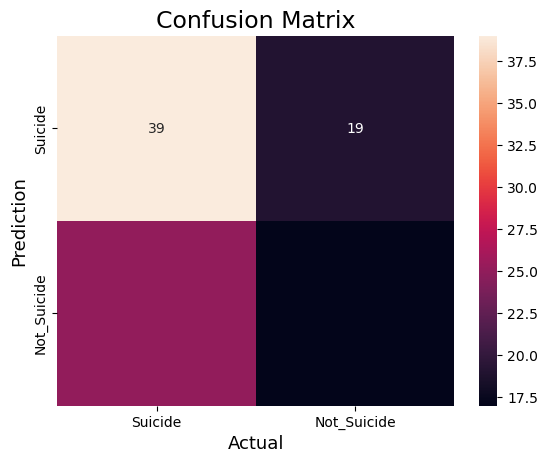

Accuracy: 0.56
Precision: 0.4722222222222222
Recall: 0.40476190476190477
F1 Score: 0.4358974358974359


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from skntk import NeuralTangentKernel as NTK

# Load the dataset
train = pd.read_csv("C:\\Users\\vpoor\\Desktop\\suicide_detection_final_cleaned.csv")
train = train.sample(n=1000, random_state=42)

# Convert the 'text' column to strings
train['text'] = train['text'].astype(str)

# Convert 'class' column to binary labels
train.loc[train['class'] == 'suicide', 'class'] = 1
train.loc[train['class'] == 'non-suicide', 'class'] = 0

# Split the data into training and test sets
train_data, test_data, train_labels, test_labels = train_test_split(train['text'], train['class'].astype(int), test_size=0.10, random_state=0)

# Split the test set into a validation set
train_data_val, val_data, train_labels_val, val_labels = train_test_split(train_data, train_labels, test_size=0.20, random_state=0)

# Create a tokenizer
tokenizer = Tokenizer(num_words=16004, oov_token='<OOV>')
tokenizer.fit_on_texts(train_data)

# Convert text to sequences and pad sequences
sequences = tokenizer.texts_to_sequences(train_data)
padded = pad_sequences(sequences, padding='post', truncating='post', maxlen=500)

# Convert validation and test sets to sequences and pad
val_sequences = tokenizer.texts_to_sequences(val_data)
val_padded = pad_sequences(val_sequences, padding='post', truncating='post', maxlen=500)

test_sequences = tokenizer.texts_to_sequences(test_data)
test_padded = pad_sequences(test_sequences, padding='post', truncating='post', maxlen=500)

# Convert data to numpy arrays
padded = np.array(padded).astype(int)
val_padded = np.array(val_padded).astype(int)
test_padded = np.array(test_padded).astype(int)

# Normalize the input data
scaler = StandardScaler()
padded_normalized = scaler.fit_transform(padded)
val_padded_normalized = scaler.transform(val_padded)
test_padded_normalized = scaler.transform(test_padded)

# Create a Neural Tangent Kernel
kernel_ntk = NTK(depth=2)

# Train a Support Vector Classifier with the NTK kernel
SVCClf = SVC(kernel=kernel_ntk)
SVCClf.fit(padded_normalized, train_labels)

# Make predictions on the test set
y_pred = SVCClf.predict(test_padded_normalized)

# Calculate and print the accuracy
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

# Calculate and print the confusion matrix
cm = confusion_matrix(test_labels, y_pred)
sns.heatmap(cm, annot=True, fmt='g', xticklabels=['Suicide', 'Not_Suicide'], yticklabels=['Suicide', 'Not_Suicide'])
plt.ylabel('Prediction', fontsize=13)
plt.xlabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

# Calculate and print the performance metrics
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
